# *Universidad ORT Uruguay* -Diploma de Especialización en Analítica de Negocios


#                                     *OBLIGATORIO GRUPAL*



   ## Entregado como requisito para la aprobación del curso de Fundamentos de modelos de                                                          datos y datamining
   

###                                                             Kary Francia - 269671
###                                                   Guillermo Vázquez - 268211
###                                                           Pedro Chouhy - 292111


###                                                       Profesor: Daniel Gramoso

###                                                                    31/08/2022

In [6]:
#instalación de librerías
library(tidyverse)
library(funModeling)
library(Hmisc)
library(rpart)
library(rattle)
library(Hmisc)
library(dplyr)
library(scales)
library(DataExplorer)
library(fastDummies)
library(woeBinning)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.6       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'funModeling' was built under R version 3.6.3"Loading required package: Hmisc
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, su

ERROR: Error: package or namespace load failed for 'DataExplorer' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 there is no package called 'rmarkdown'


In [1]:
source('C:/Users/Kary/Desktop/MBA ORT/2022/Fundam modelado datos y dataminig/SESION 2/mis_funciones.r')

In [2]:
#directorio de trabajo base
setwd('C:/Users/Kary/Desktop/MBA ORT/2022/Fundam modelado datos y dataminig/TRABAJO FINAL')
getwd()

[1] "C:/Users/Kary/Desktop/MBA ORT/2022/Fundam modelado datos y dataminig/TRABAJO FINAL"

## IMPORTACIÓN E INTEGRACIÓN DE DATOS

In [3]:
#importación de datos 
datosX1 <- read.csv('C:/Users/Kary/Desktop/MBA ORT/2022/Fundam modelado datos y dataminig/TRABAJO FINAL/datos_x1.csv', stringsAsFactors = T, sep = ';')
dim(datosX1)
datosX2 <- read.csv('C:/Users/Kary/Desktop/MBA ORT/2022/Fundam modelado datos y dataminig/TRABAJO FINAL/datos_x2.csv', stringsAsFactors = T, sep = ';')
dim(datosX2)
datosY1 <- read.csv('C:/Users/Kary/Desktop/MBA ORT/2022/Fundam modelado datos y dataminig/TRABAJO FINAL/datos_y1.csv', stringsAsFactors = T, sep = ';')
dim(datosY1)
datosY2 <- read.csv('C:/Users/Kary/Desktop/MBA ORT/2022/Fundam modelado datos y dataminig/TRABAJO FINAL/datos_y2.csv', stringsAsFactors = T, sep = ';')
dim(datosY2)

[1] 10000    15

[1] 22561    15

[1] 10000     2

[1] 22561     2

In [10]:
#integración vertical de las variables predictoras
datos_baseX <- bind_rows(datosX1, datosX2)
dim(datos_baseX)

Warning message in bind_rows_(x, .id):
"Unequal factor levels: coercing to character"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"

[1] 32561    15

In [11]:
#integración vertical de las variable a predecir
datos_baseY <- bind_rows(datosY1, datosY2)
dim(datos_baseY)

[1] 32561     2

In [12]:
#se integran ambos archivos
datos <- bind_cols(datos_baseX, datos_baseY[2])
dim(datos)

[1] 32561    16

In [13]:
#nombre de las variables
names(datos)

[1] "id"             "age"            "workclass"      "fnlwgt"        
 [5] "education"      "education_num"  "marital_status" "occupation"    
 [9] "relationship"   "race"           "sex"            "capital_gain"  
[13] "capital_loss"   "hours_per_week" "native_country" "income"

In [14]:
#vemos las primeras diez observaciones
head(datos,10)

id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [15]:
#vemos las últimas 10 observaciones
tail(datos, 10)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32552,32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32561,32561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


*FORMATEO DE ATRIBUTOS*

In [11]:
#estructura de los datos
str(datos)

'data.frame':	32561 obs. of  16 variables:
 $ id            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_los

In [12]:
summary(datos)

       id             age                    workclass         fnlwgt       
 Min.   :    1   Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.: 8141   1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :16281   Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :16281   Mean   :38.58    ?               : 1836   Mean   : 189778  
 3rd Qu.:24421   3rd Qu.:48.00    State-gov       : 1298   3rd Qu.: 237051  
 Max.   :32561   Max.   :90.00    Self-emp-inc    : 1116   Max.   :1484705  
                                 (Other)          :  981                    
         education     education_num                  marital_status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.

In [13]:
# chequeamos los niveles de la variable en texto native_country antes de transformalas a factor
table(datos$native_country)


                          ?                    Cambodia 
                        583                          19 
                     Canada                       China 
                        121                          75 
                   Columbia                        Cuba 
                         59                          95 
         Dominican-Republic                     Ecuador 
                         70                          28 
                El-Salvador                     England 
                        106                          90 
                     France                     Germany 
                         29                         137 
                     Greece                   Guatemala 
                         29                          64 
                      Haiti          Holand-Netherlands 
                         44                           1 
                   Honduras                        Hong 
                         13   

In [14]:
datos$native_country <- as.factor(datos$native_country)
table(datos$native_country)


                          ?                    Cambodia 
                        583                          19 
                     Canada                       China 
                        121                          75 
                   Columbia                        Cuba 
                         59                          95 
         Dominican-Republic                     Ecuador 
                         70                          28 
                El-Salvador                     England 
                        106                          90 
                     France                     Germany 
                         29                         137 
                     Greece                   Guatemala 
                         29                          64 
                      Haiti          Holand-Netherlands 
                         44                           1 
                   Honduras                        Hong 
                         13   

In [16]:
library(fastDummies)

Warning message:
"package 'fastDummies' was built under R version 3.6.3"

In [17]:
#generación de variables dummy para la variable income
datos_Ydummy <- dummy_cols(datos, select_columns = c("income"))

In [18]:
#recodificamos las variables dummy
names(datos_Ydummy)[18] <- "Ganancia mayor a 50K"
names(datos_Ydummy)

[1] "id"                   "age"                  "workclass"           
 [4] "fnlwgt"               "education"            "education_num"       
 [7] "marital_status"       "occupation"           "relationship"        
[10] "race"                 "sex"                  "capital_gain"        
[13] "capital_loss"         "hours_per_week"       "native_country"      
[16] "income"               "income_ <=50K"        "Ganancia mayor a 50K"

In [19]:
#datframe final
datos_final <- datos_Ydummy[,-17]
datos_final

id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,Ganancia mayor a 50K
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


## ANÁLISIS UNIVARIADO

*Estadísticas descriptivas para variables numéricas*

In [20]:
# estructura de los datos
str(datos_final)

'data.frame':	32561 obs. of  17 variables:
 $ id                  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ age                 : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass           : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt              : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education           : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num       : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status      : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation          : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship        : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race                : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex                 : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ cap

In [21]:
#frecuencias
freq(datos_final, plot = F)

          workclass frequency percentage cumulative_perc
1           Private     22696      69.70           69.70
2  Self-emp-not-inc      2541       7.80           77.50
3         Local-gov      2093       6.43           83.93
4                 ?      1836       5.64           89.57
5         State-gov      1298       3.99           93.56
6      Self-emp-inc      1116       3.43           96.99
7       Federal-gov       960       2.95           99.94
8       Without-pay        14       0.04           99.98
9      Never-worked         7       0.02          100.00

       education frequency percentage cumulative_perc
1        HS-grad     10501      32.25           32.25
2   Some-college      7291      22.39           54.64
3      Bachelors      5355      16.45           71.09
4        Masters      1723       5.29           76.38
5      Assoc-voc      1382       4.24           80.62
6           11th      1175       3.61           84.23
7     Assoc-acdm      1067       3.28           87.

[1] "Variables processed: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income"

In [22]:
#análisis descriptivo 1
glimpse(datos_final)

Observations: 32,561
Variables: 17
$ id                     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
$ age                    <int> 39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 37, ...
$ workclass              <fct>  State-gov,  Self-emp-not-inc,  Private,  Pr...
$ fnlwgt                 <int> 77516, 83311, 215646, 234721, 338409, 284582...
$ education              <fct>  Bachelors,  Bachelors,  HS-grad,  11th,  Ba...
$ education_num          <int> 13, 13, 9, 7, 13, 14, 5, 9, 14, 13, 10, 13, ...
$ marital_status         <fct>  Never-married,  Married-civ-spouse,  Divorc...
$ occupation             <fct>  Adm-clerical,  Exec-managerial,  Handlers-c...
$ relationship           <fct>  Not-in-family,  Husband,  Not-in-family,  H...
$ race                   <fct>  White,  White,  White,  Black,  Black,  Whi...
$ sex                    <fct>  Male,  Male,  Male,  Male,  Female,  Female...
$ capital_gain           <int> 2174, 0, 0, 0, 0, 0, 0, 0, 14084, 5178, 0, 0...
$ capital_loss   

In [23]:
#análisis descriptivo 2
describe(datos_final)

datos_final 

 17  Variables      32561  Observations
--------------------------------------------------------------------------------
id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   32561        0    32561        1    16281    10854     1629     3257 
     .25      .50      .75      .90      .95 
    8141    16281    24421    29305    30933 

lowest :     1     2     3     4     5, highest: 32557 32558 32559 32560 32561
--------------------------------------------------------------------------------
age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   32561        0       73        1    38.58     15.4       19       22 
     .25      .50      .75      .90      .95 
      28       37       48       58       63 

lowest : 17 18 19 20 21, highest: 85 86 87 88 90
--------------------------------------------------------------------------------
workclass 
       n  missing distinct 
   32561        0        9 

lowest :  ?         

In [24]:
#análisis descriptivo 3
df_status(datos_final)

               variable q_zeros p_zeros q_na p_na q_inf p_inf      type unique
1                    id       0    0.00    0    0     0     0   integer  32561
2                   age       0    0.00    0    0     0     0   integer     73
3             workclass       0    0.00    0    0     0     0    factor      9
4                fnlwgt       0    0.00    0    0     0     0   integer  21648
5             education       0    0.00    0    0     0     0    factor     16
6         education_num       0    0.00    0    0     0     0   integer     16
7        marital_status       0    0.00    0    0     0     0    factor      7
8            occupation       0    0.00    0    0     0     0    factor     15
9          relationship       0    0.00    0    0     0     0    factor      6
10                 race       0    0.00    0    0     0     0    factor      5
11                  sex       0    0.00    0    0     0     0    factor      2
12         capital_gain   29849   91.67    0    0   

In [25]:
eda <- profiling_num(datos_final)
eda

variable,mean,std_dev,variation_coef,p_01,p_05,p_25,p_50,p_75,p_95,p_99,skewness,kurtosis,iqr,range_98,range_80
id,1.628100e+04,9.399695e+03,0.5773414,326.6,1629,8141,16281,24421,30933,32235.4,0.0000000,1.800000,16280,"[326.6, 32235.4]","[3257, 29305]"
age,3.858165e+01,1.364043e+01,0.3535472,17.0,19,28,37,48,63,74.0,0.5587176,2.833714,20,"[17, 74]","[22, 58]"
fnlwgt,1.897784e+05,1.055500e+05,0.5561750,27185.8,39460,117827,178356,237051,379682,510072.0,1.4469134,9.217672,119224,"[27185.8, 510072]","[65716, 329054]"
education_num,1.008068e+01,2.572720e+00,0.2552130,3.0,5,9,10,12,14,16.0,-0.3116615,3.623164,3,"[3, 16]","[7, 13]"
capital_gain,1.077649e+03,7.385292e+03,6.8531527,0.0,0,0,0,0,5013,15024.0,11.9532970,157.775484,0,"[0, 15024]","[0, 0]"
capital_loss,8.730383e+01,4.029602e+02,4.6156076,0.0,0,0,0,0,0,1980.0,4.5944175,23.373489,0,"[0, 1980]","[0, 0]"
hours_per_week,4.043746e+01,1.234743e+01,0.3053463,8.0,18,40,40,45,60,80.0,0.2276320,5.916055,5,"[8, 80]","[24, 55]"
Ganancia mayor a 50K,2.408096e-01,4.275815e-01,1.7756002,0.0,0,0,0,0,1,1.0,1.2123744,2.469852,0,"[0, 1]","[0, 1]"


In [26]:
#resumen
summary(datos_final)

       id             age                    workclass         fnlwgt       
 Min.   :    1   Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.: 8141   1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :16281   Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :16281   Mean   :38.58    ?               : 1836   Mean   : 189778  
 3rd Qu.:24421   3rd Qu.:48.00    State-gov       : 1298   3rd Qu.: 237051  
 Max.   :32561   Max.   :90.00    Self-emp-inc    : 1116   Max.   :1484705  
                                 (Other)          :  981                    
         education     education_num                  marital_status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.

*Tablas de frecuencia para todas las variables cualitativas*

In [27]:
# tablas y gráficos másivos de variables cualitativas
# creamos una carpeta graficos y enviamos los gráficos a esa carpeta
frecuencias <- freq(datos_final, path_out = 'C:/Users/Kary/Desktop/MBA ORT/2022/Fundam modelado datos y dataminig/graficos', plot = T)
frecuencias


Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

          workclass frequency percentage cumulative_perc
1           Private     22696      69.70           69.70
2  Self-emp-not-inc      2541       7.80           77.50
3         Local-gov      2093       6.43           83.93
4                 ?      1836       5.64           89.57
5         State-gov      1298       3.99           93.56
6      Self-emp-inc      1116       3.43           96.99
7       Federal-gov       960       2.95           99.94
8       Without-pay        14       0.04           99.98
9      Never-worked         7       0.02          100.00



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

       education frequency percentage cumulative_perc
1        HS-grad     10501      32.25           32.25
2   Some-college      7291      22.39           54.64
3      Bachelors      5355      16.45           71.09
4        Masters      1723       5.29           76.38
5      Assoc-voc      1382       4.24           80.62
6           11th      1175       3.61           84.23
7     Assoc-acdm      1067       3.28           87.51
8           10th       933       2.87           90.38
9        7th-8th       646       1.98           92.36
10   Prof-school       576       1.77           94.13
11           9th       514       1.58           95.71
12          12th       433       1.33           97.04
13     Doctorate       413       1.27           98.31
14       5th-6th       333       1.02           99.33
15       1st-4th       168       0.52           99.85
16     Preschool        51       0.16          100.00



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

          marital_status frequency percentage cumulative_perc
1     Married-civ-spouse     14976      45.99           45.99
2          Never-married     10683      32.81           78.80
3               Divorced      4443      13.65           92.45
4              Separated      1025       3.15           95.60
5                Widowed       993       3.05           98.65
6  Married-spouse-absent       418       1.28           99.93
7      Married-AF-spouse        23       0.07          100.00



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

           occupation frequency percentage cumulative_perc
1      Prof-specialty      4140      12.71           12.71
2        Craft-repair      4099      12.59           25.30
3     Exec-managerial      4066      12.49           37.79
4        Adm-clerical      3770      11.58           49.37
5               Sales      3650      11.21           60.58
6       Other-service      3295      10.12           70.70
7   Machine-op-inspct      2002       6.15           76.85
8                   ?      1843       5.66           82.51
9    Transport-moving      1597       4.90           87.41
10  Handlers-cleaners      1370       4.21           91.62
11    Farming-fishing       994       3.05           94.67
12       Tech-support       928       2.85           97.52
13    Protective-serv       649       1.99           99.51
14    Priv-house-serv       149       0.46           99.97
15       Armed-Forces         9       0.03          100.00



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

     relationship frequency percentage cumulative_perc
1         Husband     13193      40.52           40.52
2   Not-in-family      8305      25.51           66.03
3       Own-child      5068      15.56           81.59
4       Unmarried      3446      10.58           92.17
5            Wife      1568       4.82           96.99
6  Other-relative       981       3.01          100.00



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

                 race frequency percentage cumulative_perc
1               White     27816      85.43           85.43
2               Black      3124       9.59           95.02
3  Asian-Pac-Islander      1039       3.19           98.21
4  Amer-Indian-Eskimo       311       0.96           99.17
5               Other       271       0.83          100.00



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

      sex frequency percentage cumulative_perc
1    Male     21790      66.92           66.92
2  Female     10771      33.08          100.00



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

                native_country frequency percentage cumulative_perc
1                United-States     29170      89.59           89.59
2                       Mexico       643       1.97           91.56
3                            ?       583       1.79           93.35
4                  Philippines       198       0.61           93.96
5                      Germany       137       0.42           94.38
6                       Canada       121       0.37           94.75
7                  Puerto-Rico       114       0.35           95.10
8                  El-Salvador       106       0.33           95.43
9                        India       100       0.31           95.74
10                        Cuba        95       0.29           96.03
11                     England        90       0.28           96.31
12                     Jamaica        81       0.25           96.56
13                       South        80       0.25           96.81
14                       China        75       0

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."

  income frequency percentage cumulative_perc
1  <=50K     24720      75.92           75.92
2   >50K      7841      24.08          100.00



[1] "Variables processed: workclass, education, marital_status, occupation, relationship, race, sex, native_country, income"

In [63]:
# etiquetas de la variable 
levels(datos_final$workclass)
levels(datos_final$occupation)
levels(datos_final$native_country)

[1] " ?"                " Federal-gov"      " Local-gov"       
[4] " Never-worked"     " Private"          " Self-emp-inc"    
[7] " Self-emp-not-inc" " State-gov"        " Without-pay"

[1] " ?"                 " Adm-clerical"      " Armed-Forces"     
 [4] " Craft-repair"      " Exec-managerial"   " Farming-fishing"  
 [7] " Handlers-cleaners" " Machine-op-inspct" " Other-service"    
[10] " Priv-house-serv"   " Prof-specialty"    " Protective-serv"  
[13] " Sales"             " Tech-support"      " Transport-moving"

[1] " ?"                          " Cambodia"                  
 [3] " Canada"                     " China"                     
 [5] " Columbia"                   " Cuba"                      
 [7] " Dominican-Republic"         " Ecuador"                   
 [9] " El-Salvador"                " England"                   
[11] " France"                     " Germany"                   
[13] " Greece"                     " Guatemala"                 
[15] " Haiti"                      " Holand-Netherlands"        
[17] " Honduras"                   " Hong"                      
[19] " Hungary"                    " India"                     
[21] " Iran"                       " Ireland"                   
[23] " Italy"                      " Jamaica"                   
[25] " Japan"                      " Laos"                      
[27] " Mexico"                     " Nicaragua"                 
[29] " Outlying-US(Guam-USVI-etc)" " Peru"                      
[31] " Philippines"                " Poland"                    
[33] " Portugal"                   " Puerto-Rico"               
[35] " Scotland"                   " South"                     
[37] " Taiwan"                     " Thailand"                  
[39] " Trinadad&Tobago"            " United-States"             
[41] " Vietnam"                    " Yugoslavia"

In [28]:
# asignación de etiqueta 'SD' a la primera etiqueta con valor vacío
levels(datos_final$workclass)[1] <- 'SD'  # sin dato
levels(datos_final$workclass)
levels(datos_final$occupation)[1] <- 'SD'  # sin dato
levels(datos_final$occupation)
levels(datos_final$native_country)[1] <- 'SD'  # sin dato
levels(datos_final$native_country)

[1] "SD"                " Federal-gov"      " Local-gov"       
[4] " Never-worked"     " Private"          " Self-emp-inc"    
[7] " Self-emp-not-inc" " State-gov"        " Without-pay"

[1] "SD"                 " Adm-clerical"      " Armed-Forces"     
 [4] " Craft-repair"      " Exec-managerial"   " Farming-fishing"  
 [7] " Handlers-cleaners" " Machine-op-inspct" " Other-service"    
[10] " Priv-house-serv"   " Prof-specialty"    " Protective-serv"  
[13] " Sales"             " Tech-support"      " Transport-moving"

[1] "SD"

In [29]:
summary(datos_final)

       id             age                    workclass         fnlwgt       
 Min.   :    1   Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.: 8141   1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :16281   Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :16281   Mean   :38.58   SD               : 1836   Mean   : 189778  
 3rd Qu.:24421   3rd Qu.:48.00    State-gov       : 1298   3rd Qu.: 237051  
 Max.   :32561   Max.   :90.00    Self-emp-inc    : 1116   Max.   :1484705  
                                 (Other)          :  981                    
         education     education_num                  marital_status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.

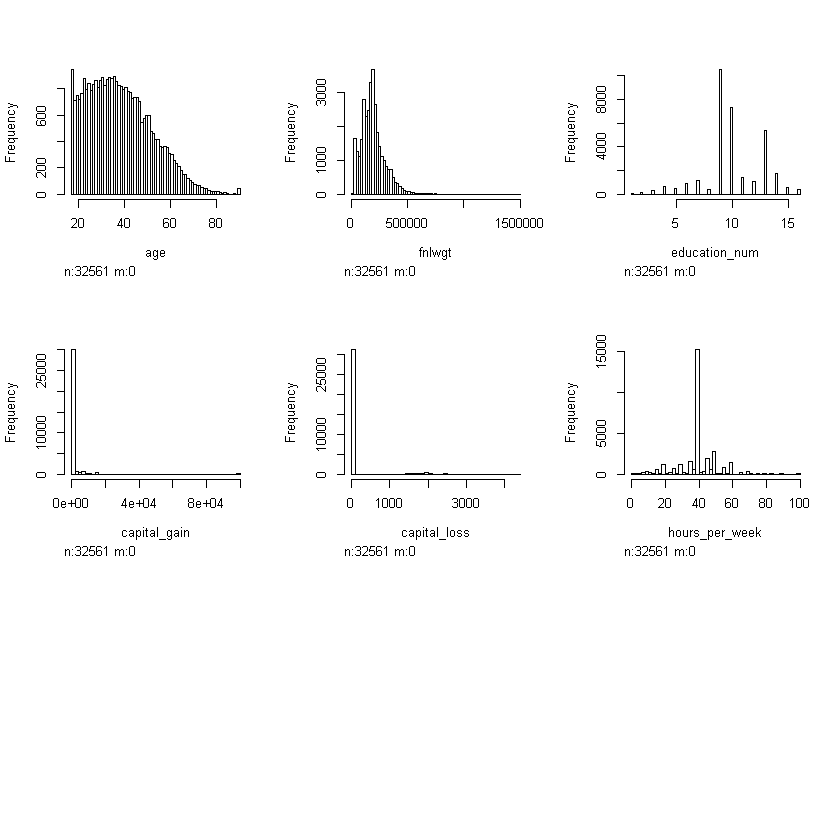

In [30]:
datos_final %>% select(2:17) %>% select_if(is.numeric) %>% hist()

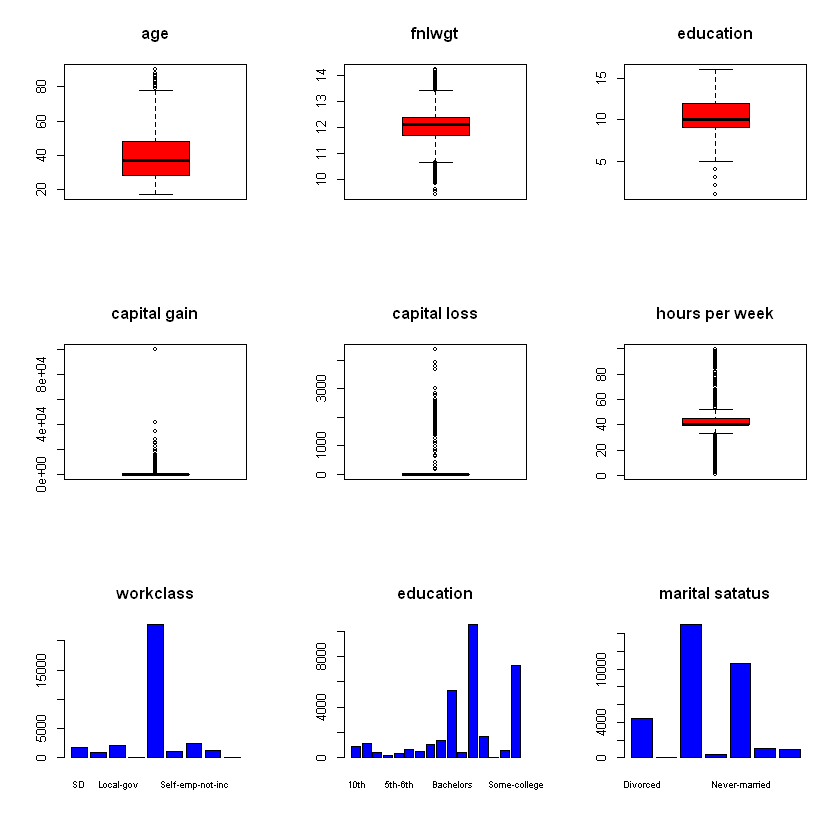

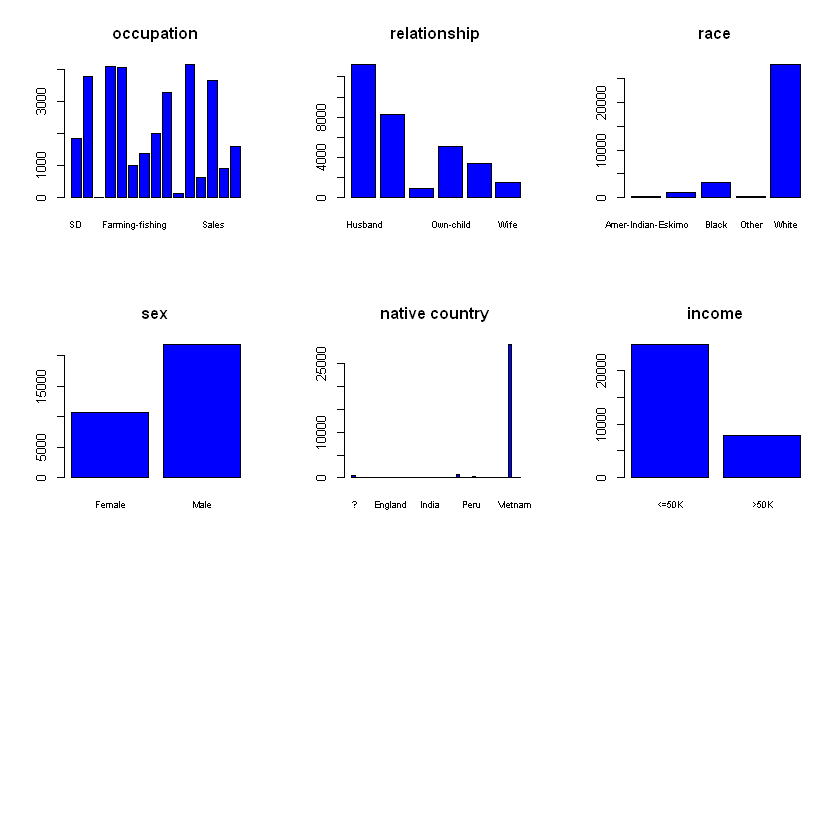

In [31]:
#Creamos un panel de gráfico de cajas de todas las variables numéricas y de barras para las variables categóricas
par(mfrow = c(3, 3))
boxplot(datos_final$age, col = 'red', main = 'age')
boxplot(log(datos_final$fnlwgt), col = 'red', main = 'fnlwgt')
boxplot(datos_final$education_num, col = 'red', main = 'education')
boxplot(datos_final$capital_gain, col = 'red', main = 'capital gain')
boxplot(datos_final$capital_loss, col = 'red', main = 'capital loss')
boxplot(datos_final$hours_per_week, col = 'red', main = 'hours per week')
barplot(table(datos_final$workclass), main = 'workclass', col = 'blue', cex.names = 0.7)
barplot(table(datos_final$education), main = 'education', col = 'blue', cex.names = 0.7)
barplot(table(datos_final$marital_status ), main = 'marital satatus', col = 'blue', cex.names = 0.7)
barplot(table(datos_final$occupation), main = 'occupation', col = 'blue', cex.names = 0.7)
barplot(table(datos_final$relationship), main = 'relationship', col = 'blue', cex.names = 0.7)
barplot(table(datos_final$race), main = 'race', col = 'blue', cex.names = 0.7)
barplot(table(datos_final$sex), main = 'sex', col = 'blue', cex.names = 0.7)
barplot(table(datos_final$native_country), main = 'native country', col = 'blue', cex.names = 0.7)
barplot(table(datos_final$income), main = 'income', col = 'blue', cex.names = 0.7)

## ANÁLISIS BIVARIADO

In [32]:
#queremos predecir la probabilidad de que una persona gane más de USD 50k anuales en USA.
#tabla bivariada
bivar_simple(datos_final, name_y = 'Ganancia mayor a 50K', names_excl = c('id'))

age
|        | Score| Total|   %Tot|   Aus|   %Aus| Pres|  %Pres| Prob_Pres(%)| AP_odd|    WOE|   IV|   K-S|
|:-------|-----:|-----:|------:|-----:|------:|----:|------:|------------:|------:|------:|----:|-----:|
|[59,90] | 65.51|  2999|   9.21|  2214|   8.96|  785|  10.01|        26.18|   2.82| -11.14| 0.00|  1.06|
|[51,59) | 54.14|  3461|  10.63|  2148|   8.69| 1313|  16.75|        37.94|   1.64| -65.60| 0.05|  9.11|
|[46,51) | 47.87|  3167|   9.73|  1903|   7.70| 1264|  16.12|        39.91|   1.51| -73.91| 0.06| 17.53|
|[42,46) | 43.47|  3008|   9.24|  1896|   7.67| 1112|  14.18|        36.97|   1.71| -61.47| 0.04| 24.05|
|[38,42) | 39.49|  3245|   9.97|  2138|   8.65| 1107|  14.12|        34.11|   1.93| -49.00| 0.03| 29.51|
|[34,38) | 35.49|  3518|  10.80|  2503|  10.13| 1015|  12.94|        28.85|   2.47| -24.56| 0.01| 32.33|
|[31,34) | 31.99|  2591|   7.96|  2028|   8.20|  563|   7.18|        21.73|   3.60|  13.33| 0.00| 31.31|
|[27,31) | 28.50|  3376|  10.37|  2871|  11.61|  50

Warning message in min(xx[xx > upper]):
"ningún argumento finito para min; retornando Inf"

Ganancia mayor a 50K
|   | Score| Total|   %Tot|   Aus| %Aus| Pres| %Pres| Prob_Pres(%)| AP_odd|  WOE|  IV| K-S|
|:--|-----:|-----:|------:|-----:|----:|----:|-----:|------------:|------:|----:|---:|---:|
|1  |  1.00|  7841|  24.08|     0|    0| 7841|   100|          100|   0.00| -Inf| Inf| 100|
|0  |  0.00| 24720|  75.92| 24720|  100|    0|     0|            0|    Inf|  Inf| Inf|   0|
|   |  0.24| 32561| 100.00| 24720|  100| 7841|   100|           NA|   3.15|   NA| Inf| 100|


In [60]:
#library(ggplot2)

In [61]:
#install.packages('ggplot2')


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.6             FALSE



installing the source package 'ggplot2'



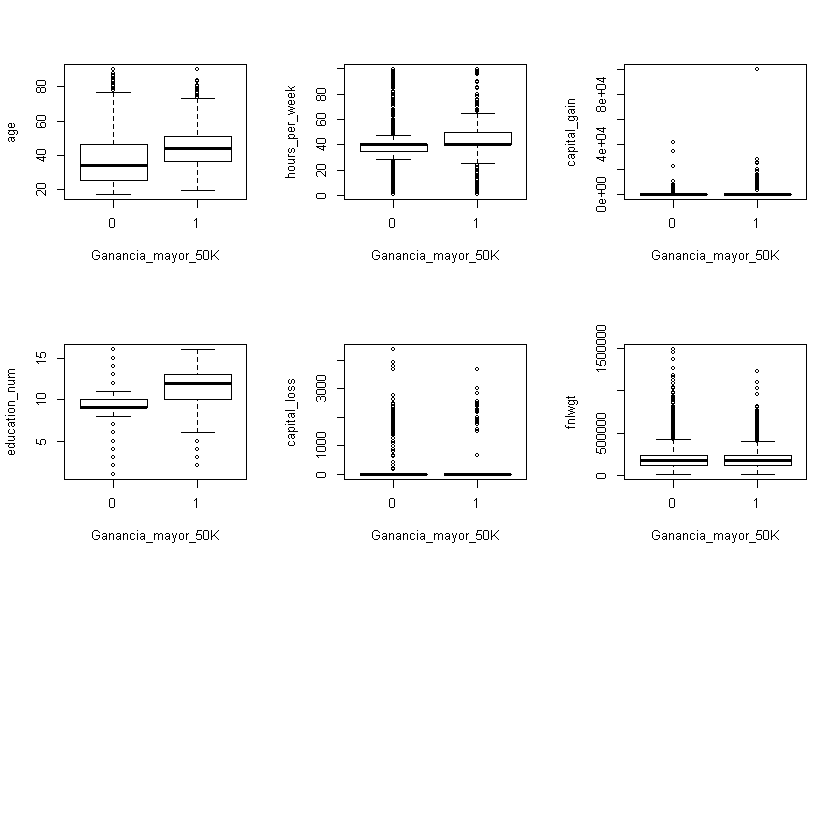

In [124]:
#Boxplots que relaciones todas las variables continuas contra la variable a predecir
par(mfrow = c(3, 3))
boxplot(age ~ Ganancia_mayor_50K, data = datos_final)
boxplot(hours_per_week ~ Ganancia_mayor_50K, data = datos_final)
boxplot(capital_gain ~ Ganancia_mayor_50K, data = datos_final)
boxplot(education_num ~ Ganancia_mayor_50K, data = datos_final)
boxplot(capital_loss ~ Ganancia_mayor_50K, data = datos_final)
boxplot(fnlwgt ~ Ganancia_mayor_50K, data = datos_final)

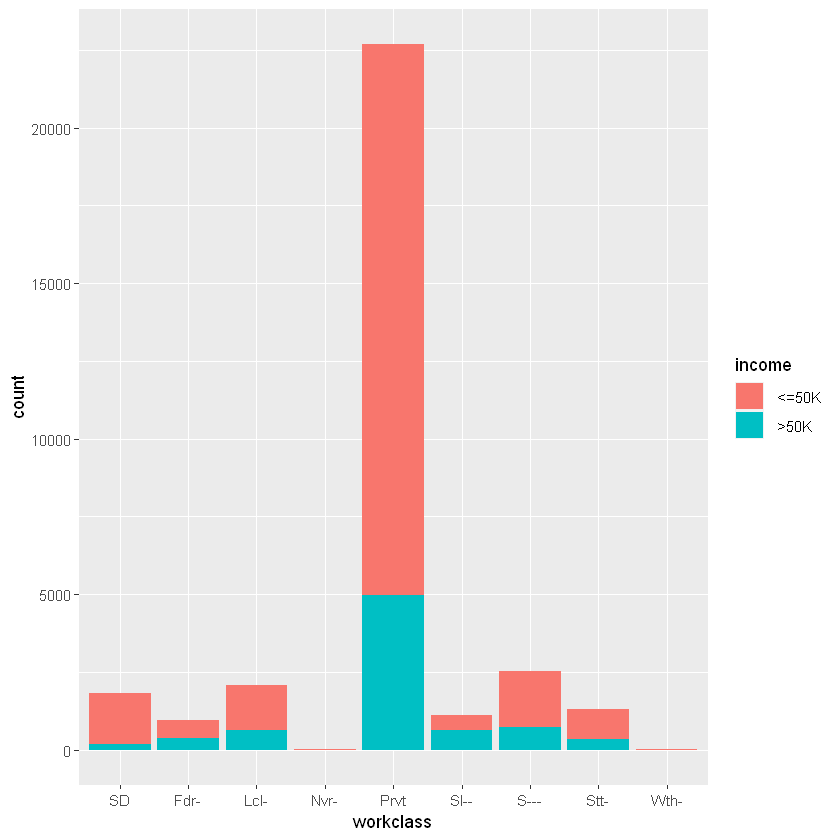

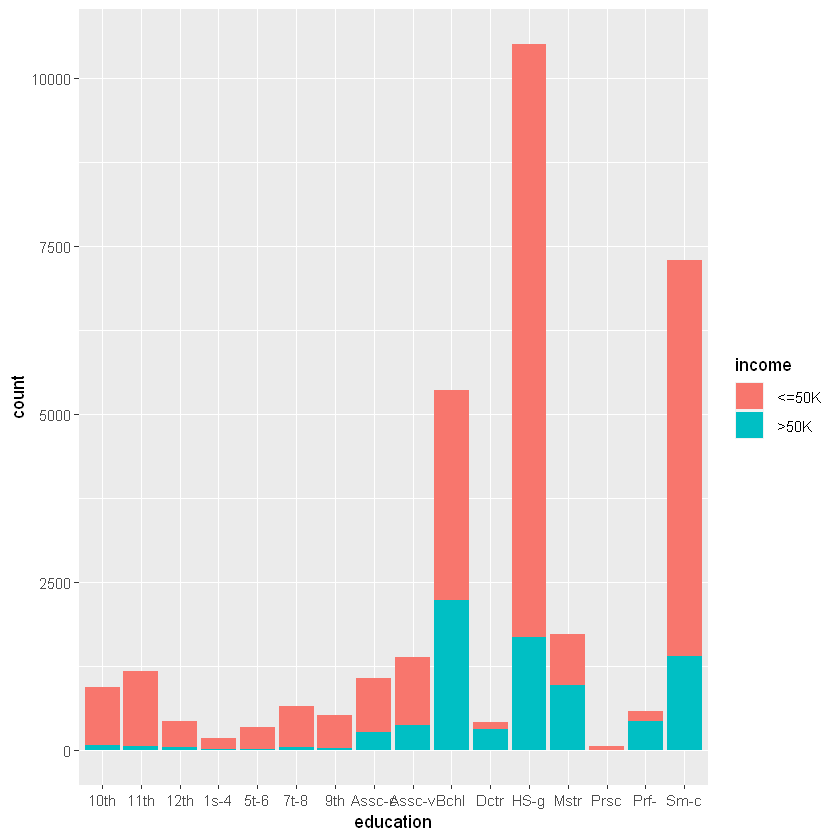

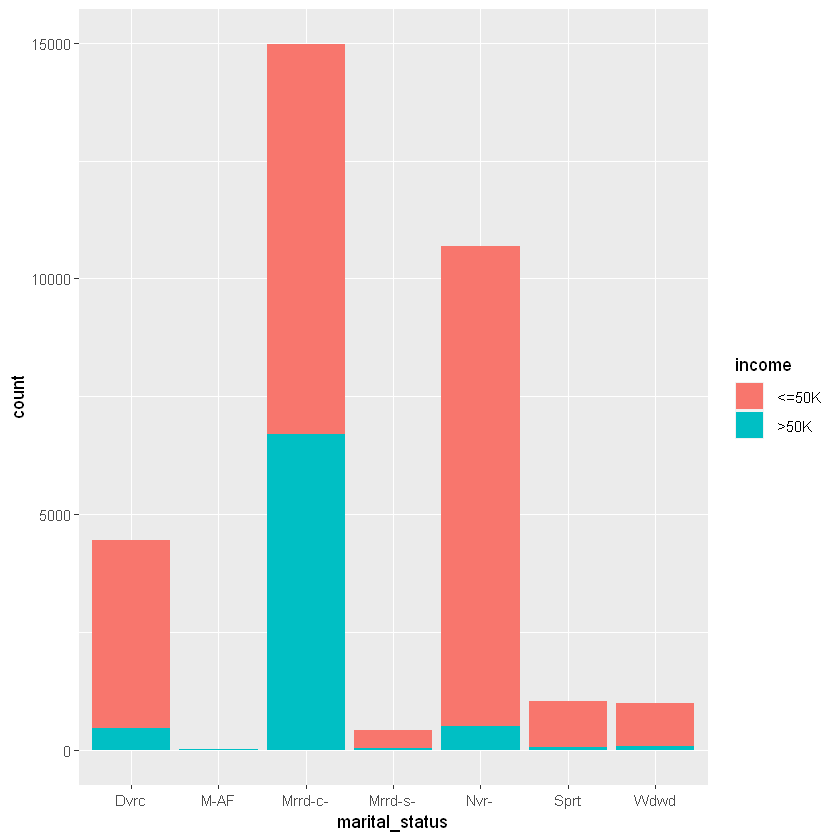

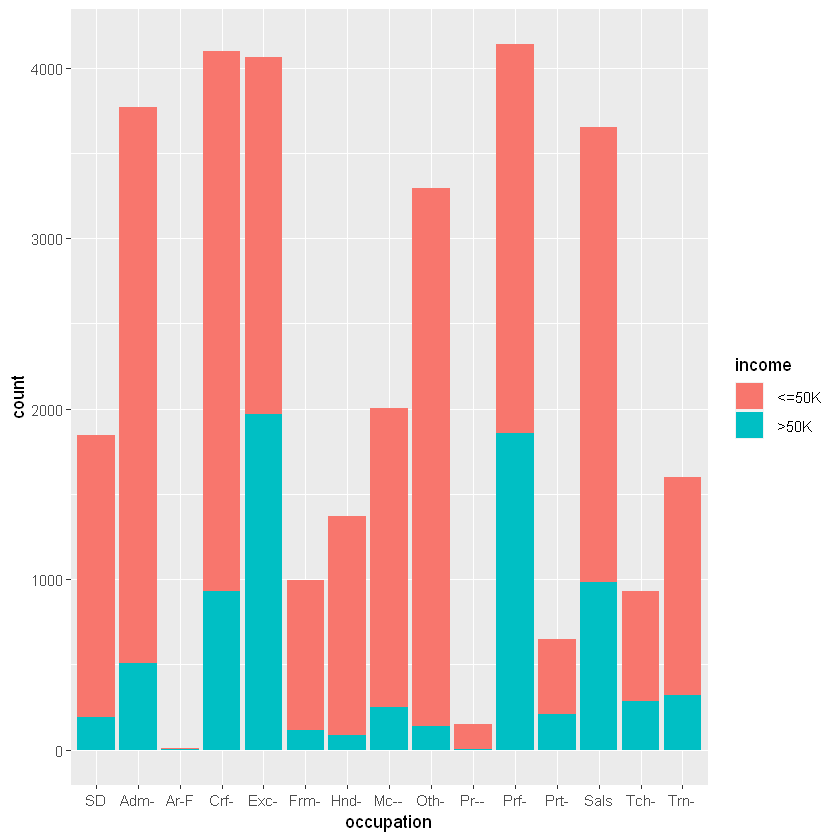

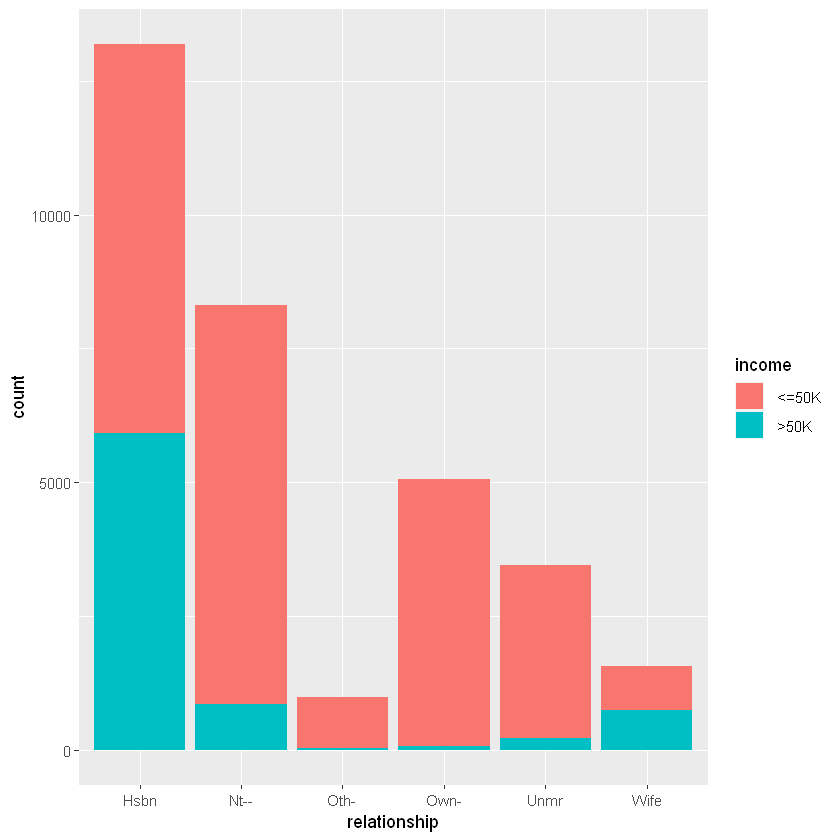

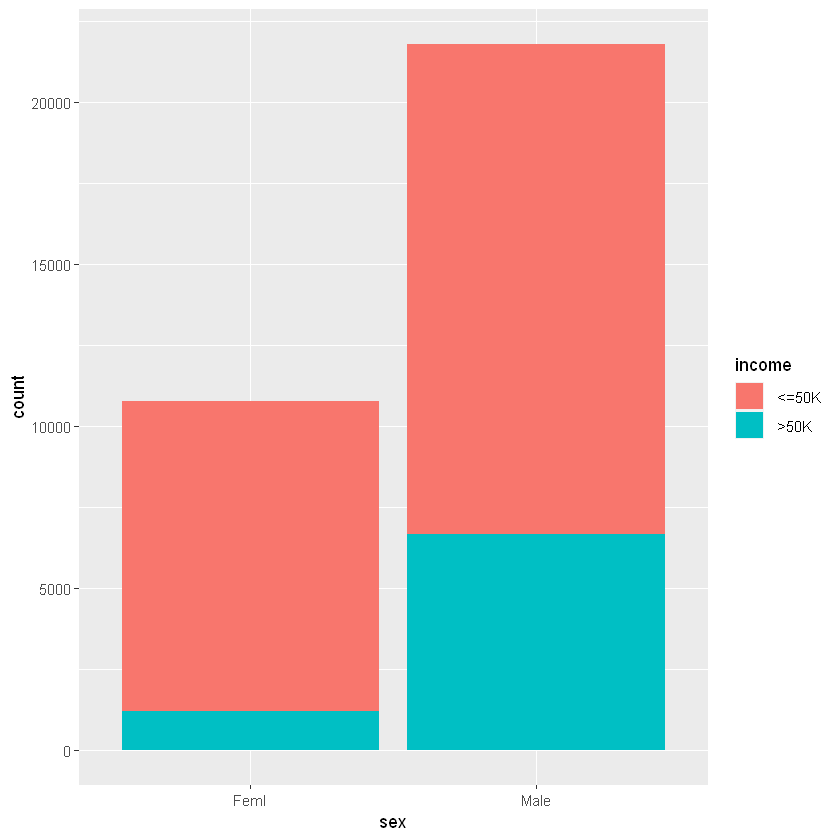

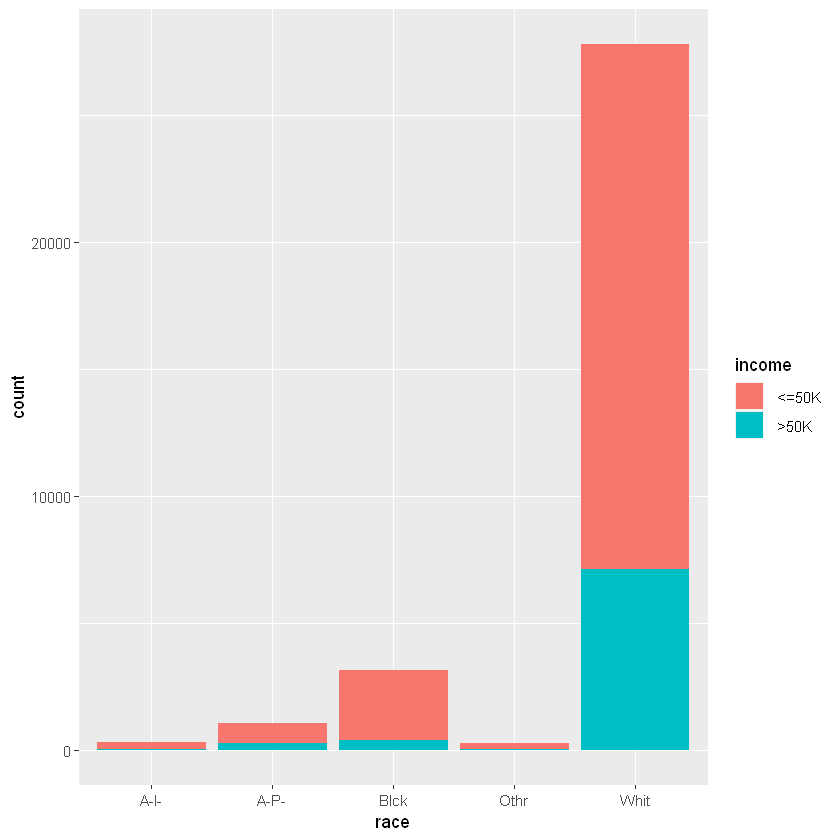

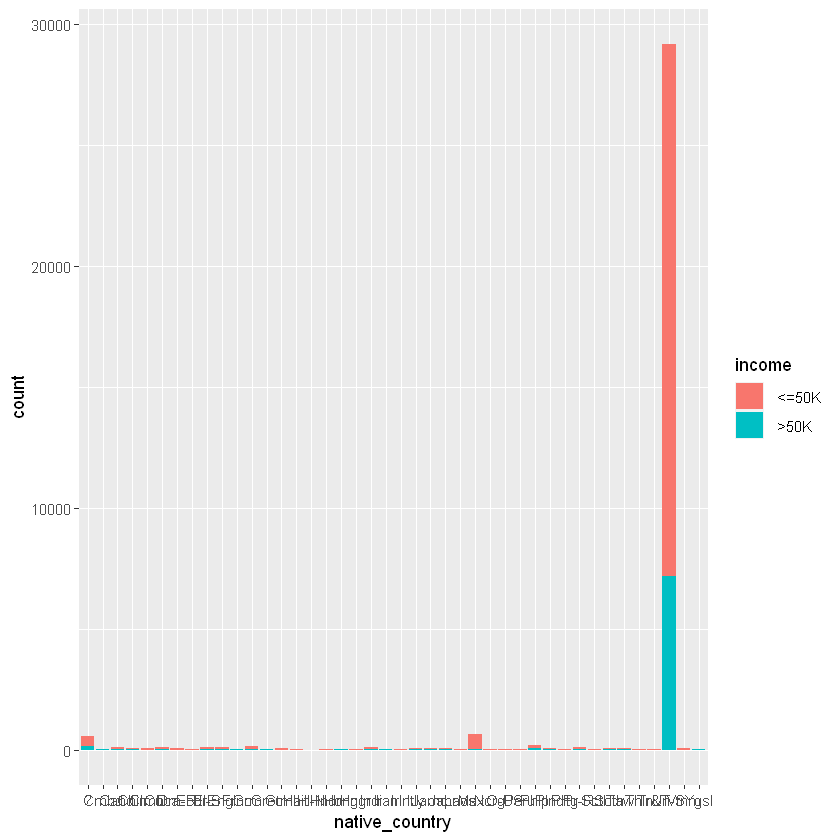

In [112]:
#Gráficos de las variables cualitativas contra la variable a predecir
ggplot(data=datos_final, aes(x=workclass, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
ggplot(data=datos_final, aes(x=education, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
ggplot(data=datos_final, aes(x=marital_status, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
ggplot(data=datos_final, aes(x=occupation, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
ggplot(data=datos_final, aes(x=relationship, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
ggplot(data=datos_final, aes(x=sex, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
ggplot(data=datos_final, aes(x=race, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
ggplot(data=datos_final, aes(x=native_country, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)

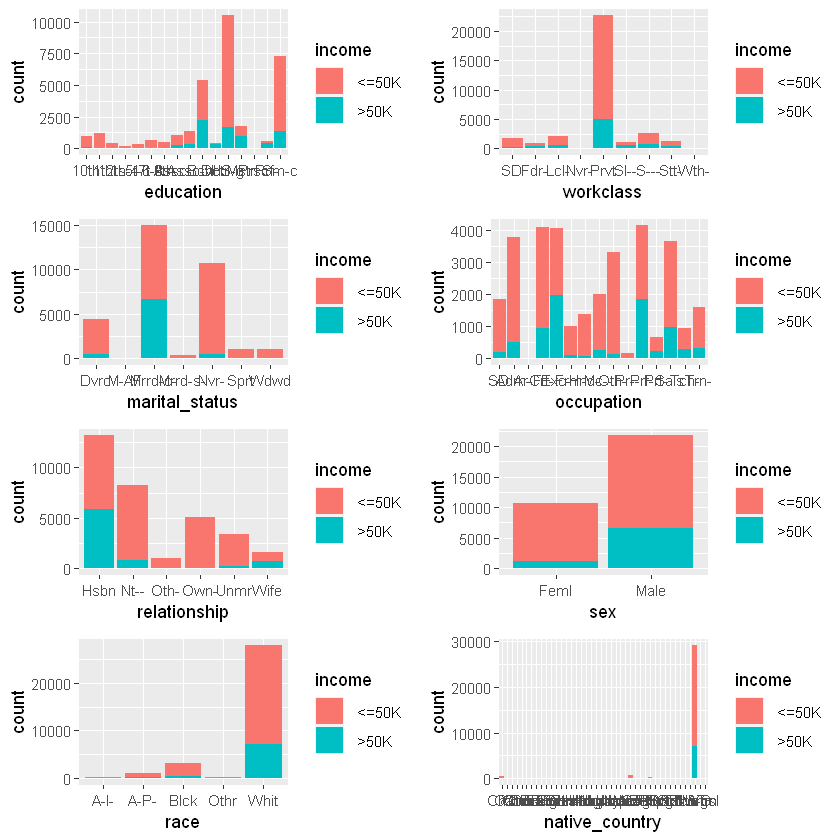

In [117]:
#Gráficos de las variables cualitativas contra la variable a predecir
library(ggplot2)
library(gridExtra)
library(dplyr)
gg1 <- ggplot(data=datos_final, aes(x=education, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
gg2 <- ggplot(data=datos_final, aes(x=workclass, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
gg3 <- ggplot(data=datos_final, aes(x=marital_status, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
gg4 <- ggplot(data=datos_final, aes(x=occupation, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
gg5 <- ggplot(data=datos_final, aes(x=relationship, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
gg6 <- ggplot(data=datos_final, aes(x=sex, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
gg7 <- ggplot(data=datos_final, aes(x=race, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
gg8 <- ggplot(data=datos_final, aes(x=native_country, fill=income)) + geom_bar() +scale_x_discrete(labels=abbreviate)
grid.arrange(gg1,gg2,gg3,gg4,gg5,gg6,gg7,gg8,nrow=4)

In [94]:
##Tabla y gráfico de correlaciones entre las variables continuas
correl <- datos_final %>% select(-id) %>% select_if(is.numeric) %>% 
  cor(y = datos_final$Gananciamayora50K, use = "pairwise.complete.obs", method = 'spearman') %>% round(2)

#correl <- correl[order(-correl[, 7]),]
correl 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Ganancia_mayor_50K
age,1.00,-0.08,0.07,0.12,0.06,0.14,0.27
fnlwgt,-0.08,1.00,-0.04,-0.01,-0.01,-0.02,-0.01
education_num,0.07,-0.04,1.00,0.12,0.07,0.17,0.33
capital_gain,0.12,-0.01,0.12,1.00,-0.07,0.09,0.28
capital_loss,0.06,-0.01,0.07,-0.07,1.00,0.06,0.14
hours_per_week,0.14,-0.02,0.17,0.09,0.06,1.00,0.27
Ganancia_mayor_50K,0.27,-0.01,0.33,0.28,0.14,0.27,1.00


In [95]:
library(reshape2)
melted_cormat <- melt(correl)
head(melted_cormat)

Var1,Var2,value
age,age,1.00
fnlwgt,age,-0.08
education_num,age,0.07
capital_gain,age,0.12
capital_loss,age,0.06
hours_per_week,age,0.14


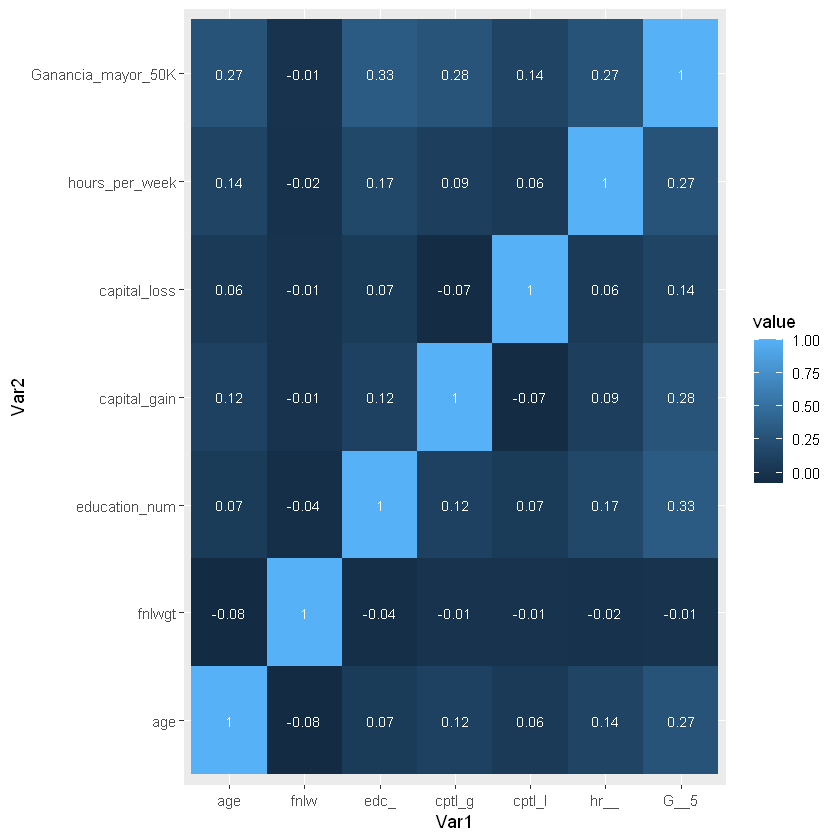

In [96]:
#Tabla y gráfico de correlaciones entre las variables continuas
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()+geom_text(aes(Var2, Var1, label = value), color = "white", size = 3)+ scale_x_discrete(labels=abbreviate)

## IMPUTACIÓN VALORES PERDIDOS

Se observa en el summary que no contamos con valores perdidos (NA´s) en el dataset

In [126]:
summary(datos_final)

       id             age                    workclass         fnlwgt       
 Min.   :    1   Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.: 8141   1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :16281   Median :37.00    Local-gov       : 2093   Median : 178356  
 Mean   :16281   Mean   :38.58   SD               : 1836   Mean   : 189778  
 3rd Qu.:24421   3rd Qu.:48.00    State-gov       : 1298   3rd Qu.: 237051  
 Max.   :32561   Max.   :90.00    Self-emp-inc    : 1116   Max.   :1484705  
                                 (Other)          :  981                    
         education     education_num                  marital_status 
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5355   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.

## CAPPING DE VARIABLES

In [135]:
# capping masivo (mínimo y máximo)
cap <- function(x){
    
    require(scales)
    if( is.numeric(x) | is.integer(x) ){
        lim.inf <- min(quantile(x, 0.01, na.rm = T), quantile(x, 0.25, na.rm = T) - IQR(x, na.rm = T)*3 )
        lim.sup <- max(quantile(x, 0.99, na.rm = T), quantile(x, 0.75, na.rm = T) + IQR(x, na.rm = T)*3)
        x <- squish(x, range = c(lim.inf, lim.sup)) 
     }
}

Las variables con capping en el quantil 99 son fnlwgt, capital_gain, capital_loss y hours_per_week

In [134]:
datos_final_cap <- datos_final %>% select(age:hours_per_week) %>% select_if(is.numeric) %>% sapply(cap) %>% as.data.frame()
summary(datos_final_cap)

      age            fnlwgt       education_num    capital_gain    
 Min.   :17.00   Min.   : 12285   Min.   : 1.00   Min.   :    0.0  
 1st Qu.:28.00   1st Qu.:117827   1st Qu.: 9.00   1st Qu.:    0.0  
 Median :37.00   Median :178356   Median :10.00   Median :    0.0  
 Mean   :38.58   Mean   :189123   Mean   :10.08   Mean   :  633.8  
 3rd Qu.:48.00   3rd Qu.:237051   3rd Qu.:12.00   3rd Qu.:    0.0  
 Max.   :90.00   Max.   :594723   Max.   :16.00   Max.   :15024.0  
  capital_loss    hours_per_week 
 Min.   :   0.0   Min.   : 8.00  
 1st Qu.:   0.0   1st Qu.:40.00  
 Median :   0.0   Median :40.00  
 Mean   :  83.8   Mean   :40.39  
 3rd Qu.:   0.0   3rd Qu.:45.00  
 Max.   :1980.0   Max.   :80.00  

In [136]:
names(datos_final_cap) <- paste(names(datos_final_cap), 'cap', sep = '_')
names(datos_final_cap)

[1] "age_cap"            "fnlwgt_cap"         "education_num_cap" 
[4] "capital_gain_cap"   "capital_loss_cap"   "hours_per_week_cap"

In [137]:
# integramos con el dataset original
datos <- bind_cols(datos_final, datos_final_cap)
dim(datos)

[1] 32561    23

## COLAPSO VARIABLES CUALITATIVAS

In [158]:
native_country_rec <- fct_lump_min(datos_final$native_country, min = 650)
freq(native_country_rec, plot = F)

var,frequency,percentage,cumulative_perc
United-States,29170,89.59,89.59
Other,3391,10.41,100.00


In [174]:
#Colapsamos colocando de techo 3300 porque es el que más se ajusta a todas las variables cualitativas con pocas observaciones
datos_fact_rec <- datos %>% select_if(is.factor) %>% sapply(fct_lump_min, min = 3300) %>% as.data.frame()
dim(datos_fact_rec)

[1] 32561     8

In [173]:
freq(datos_fact_rec, plot = F)

  workclass frequency percentage cumulative_perc
1   Private     22696       69.7            69.7
2     Other      9865       30.3           100.0

      education frequency percentage cumulative_perc
1       HS-grad     10501      32.25           32.25
2         Other      9414      28.91           61.16
3  Some-college      7291      22.39           83.55
4     Bachelors      5355      16.45          100.00

       marital_status frequency percentage cumulative_perc
1  Married-civ-spouse     14976      45.99           45.99
2       Never-married     10683      32.81           78.80
3            Divorced      4443      13.65           92.45
4               Other      2459       7.55          100.00

        occupation frequency percentage cumulative_perc
1            Other     12836      39.42           39.42
2   Prof-specialty      4140      12.71           52.13
3     Craft-repair      4099      12.59           64.72
4  Exec-managerial      4066      12.49           77.21
5     Adm-

[1] "Variables processed: workclass, education, marital_status, occupation, relationship, race, sex, income"

In [175]:
names(datos_fact_rec) <- paste(names(datos_fact_rec), 'rec', sep = '_')
names(datos_fact_rec)

[1] "workclass_rec"      "education_rec"      "marital_status_rec"
[4] "occupation_rec"     "relationship_rec"   "race_rec"          
[7] "sex_rec"            "income_rec"

In [201]:
datos2 <- datos %>% select_if(is.numeric) %>% bind_cols(datos_fact_rec)
dim(datos2)

[1] 32561    22

In [202]:
head(datos2)

id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Ganancia_mayor_50K,age_cap,fnlwgt_cap,...,capital_loss_cap,hours_per_week_cap,workclass_rec,education_rec,marital_status_rec,occupation_rec,relationship_rec,race_rec,sex_rec,income_rec
1,39,77516,13,2174,0,40,0,39,77516,...,0,40,Other,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
2,50,83311,13,0,0,13,0,50,83311,...,0,13,Other,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
3,38,215646,9,0,0,40,0,38,215646,...,0,40,Private,HS-grad,Divorced,Other,Not-in-family,White,Male,<=50K
4,53,234721,7,0,0,40,0,53,234721,...,0,40,Private,Other,Married-civ-spouse,Other,Husband,Other,Male,<=50K
5,28,338409,13,0,0,40,0,28,338409,...,0,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Other,Other,Female,<=50K
6,37,284582,14,0,0,40,0,37,284582,...,0,40,Private,Other,Married-civ-spouse,Exec-managerial,Other,White,Female,<=50K


## TABLAS DE PERFORMANCE DE TODAS LAS VARIABLES (TRAINING)

In [203]:
# generamos los vectores de observaciones de train y testing
set.seed(123) # se fija una semilla para que los resultados aleatorios sean reproducibles
train <- sample(nrow(datos2), nrow(datos2)*0.5) # establecemos training en el 50% de los casos
test <- (-train)

In [183]:
length(train)

[1] 16280

In [184]:
length(test)

[1] 16280

In [223]:
# performance en train


## TABLA Y GRÁFICO DE IMPORTANCIA DE VARIABLES MEDIDA POR EL INDICADOR INFORMATION VALUE

In [206]:
iv <- datos2[train, ] %>% iv_gain(name_y = 'Ganancia_mayor_50K', names_excl = c('Ganancia_mayor_50K'))
print(iv)

                      IV Gain(%)
income_rec         31.50  100.00
relationship_rec    1.43   19.04
marital_status_rec  1.34   19.62
age                 1.06   11.63
age_cap             1.06   11.63
education_num       0.70   10.93
education_num_cap   0.70   10.93
occupation_rec      0.58    9.40
hours_per_week      0.46    7.25
hours_per_week_cap  0.46    7.25
capital_gain        0.32    5.50
capital_gain_cap    0.32    5.50
sex_rec             0.29    4.42
education_rec       0.24    3.94
capital_loss        0.08    1.36
capital_loss_cap    0.08    1.36
race_rec            0.06    0.87
workclass_rec       0.03    0.47
fnlwgt              0.01    0.11
fnlwgt_cap          0.01    0.11
rand.1              0.00    0.04
rand.2              0.00    0.03
rand.3              0.00    0.06
id                  0.00    0.08


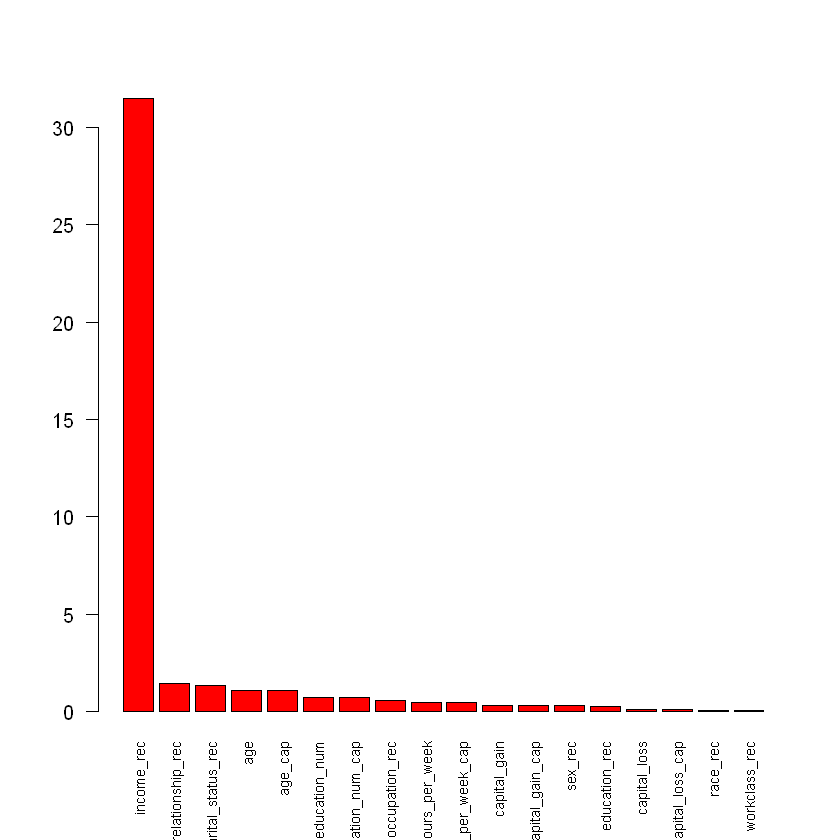

In [207]:
# plot IV
par(las=2) # make label text perpendicular to axis
barplot(iv[iv[, 1] > 0.02, 1], horiz = FALSE, cex.names = 0.7, col = 'red')

## GENERACIÓN DE VARIABLES INDICATRICES

In [209]:
head(datos2)

id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Ganancia_mayor_50K,age_cap,fnlwgt_cap,...,capital_loss_cap,hours_per_week_cap,workclass_rec,education_rec,marital_status_rec,occupation_rec,relationship_rec,race_rec,sex_rec,income_rec
1,39,77516,13,2174,0,40,0,39,77516,...,0,40,Other,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
2,50,83311,13,0,0,13,0,50,83311,...,0,13,Other,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
3,38,215646,9,0,0,40,0,38,215646,...,0,40,Private,HS-grad,Divorced,Other,Not-in-family,White,Male,<=50K
4,53,234721,7,0,0,40,0,53,234721,...,0,40,Private,Other,Married-civ-spouse,Other,Husband,Other,Male,<=50K
5,28,338409,13,0,0,40,0,28,338409,...,0,40,Private,Bachelors,Married-civ-spouse,Prof-specialty,Other,Other,Female,<=50K
6,37,284582,14,0,0,40,0,37,284582,...,0,40,Private,Other,Married-civ-spouse,Exec-managerial,Other,White,Female,<=50K


In [210]:
datos_dum <- datos2 %>% select(workclass_rec, education_rec, marital_status_rec, occupation_rec, relationship_rec, race_rec, sex_rec) %>%
  dummy_cols(remove_most_frequent_dummy = T, ignore_na = FALSE, remove_selected_columns = FALSE)
names(datos_dum)

[1] "workclass_rec"                     "education_rec"                    
 [3] "marital_status_rec"                "occupation_rec"                   
 [5] "relationship_rec"                  "race_rec"                         
 [7] "sex_rec"                           "workclass_rec_Other"              
 [9] "education_rec_ Bachelors"          "education_rec_ Some-college"      
[11] "education_rec_Other"               "marital_status_rec_ Divorced"     
[13] "marital_status_rec_ Never-married" "marital_status_rec_Other"         
[15] "occupation_rec_ Adm-clerical"      "occupation_rec_ Craft-repair"     
[17] "occupation_rec_ Exec-managerial"   "occupation_rec_ Prof-specialty"   
[19] "occupation_rec_ Sales"             "relationship_rec_ Not-in-family"  
[21] "relationship_rec_ Own-child"       "relationship_rec_ Unmarried"      
[23] "relationship_rec_Other"            "race_rec_Other"                   
[25] "sex_rec_ Female"

In [211]:
head(datos_dum, 10)

workclass_rec,education_rec,marital_status_rec,occupation_rec,relationship_rec,race_rec,sex_rec,workclass_rec_Other,education_rec_ Bachelors,education_rec_ Some-college,...,occupation_rec_ Craft-repair,occupation_rec_ Exec-managerial,occupation_rec_ Prof-specialty,occupation_rec_ Sales,relationship_rec_ Not-in-family,relationship_rec_ Own-child,relationship_rec_ Unmarried,relationship_rec_Other,race_rec_Other,sex_rec_ Female
Other,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,1,1,0,...,0,0,0,0,1,0,0,0,0,0
Other,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,1,0,...,0,1,0,0,0,0,0,0,0,0
Private,HS-grad,Divorced,Other,Not-in-family,White,Male,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Private,Other,Married-civ-spouse,Other,Husband,Other,Male,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Private,Bachelors,Married-civ-spouse,Prof-specialty,Other,Other,Female,0,1,0,...,0,0,1,0,0,0,0,1,1,1
Private,Other,Married-civ-spouse,Exec-managerial,Other,White,Female,0,0,0,...,0,1,0,0,0,0,0,1,0,1
Private,Other,Other,Other,Not-in-family,Other,Female,0,0,0,...,0,0,0,0,1,0,0,0,1,1
Other,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Private,Other,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,0,...,0,0,1,0,1,0,0,0,0,1
Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## GENERACIÓN DE VARIABLES WOEs

In [190]:
library(woeBinning)

In [204]:
bins_y <- datos2 %>% select(Ganancia_mayor_50K, age:income_rec) %>% woe.tree.binning('Ganancia_mayor_50K', datos, event.class = '0', 
          min.perc.total = 0.01, stop.limit = 0.02, abbrev.fact.levels = 0)

In [205]:
table_bin <- woe.binning.table(bins_y)
table_bin

Final.Bin,Total.Count,Total.Distr.,1.Count,0.Count,1.Distr.,0.Distr.,0.Rate,WOE,IV
<=50K,24720,75.9%,0,24720,0.0%,100.0%,100.0%,-921.0,9.209
>50K,7841,24.1%,7841,0,100.0%,0.0%,0.0%,921.0,9.209
Total,32561,100.0%,7841,24720,100.0%,100.0%,75.9%,NA,18.417
Final.Bin,Total.Count,Total.Distr.,1.Count,0.Count,1.Distr.,0.Distr.,0.Rate,WOE,IV
Own-child,5068,15.6%,67,5001,0.9%,20.2%,98.7%,-316.4,0.613
Unmarried + Not-in-family,11751,36.1%,1074,10677,13.7%,43.2%,90.9%,-114.8,0.339
Other,2549,7.8%,782,1767,10.0%,7.1%,69.3%,33.3,0.009
Husband,13193,40.5%,5918,7275,75.5%,29.4%,55.1%,94.2,0.434
Total,32561,100.0%,7841,24720,100.0%,100.0%,75.9%,NA,1.395
Final.Bin,Total.Count,Total.Distr.,1.Count,0.Count,1.Distr.,0.Distr.,0.Rate,WOE,IV
